In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter

In [2]:
# read in the data
maindf = pd.read_csv('praat_formants.csv', encoding = 'utf-8')
maindf.head()

,file,word,phoneme,time,duration,F0,F1,F2,F3
0,ildp15_JPI_20150225_sikitaani_1ac,NaN,x,799.632758,0.399816,--undefined--,632.161892,1522.918244,3065.005646
1,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,ʃ,101.683128,0.850474,573.1977093622432,1125.413057,1866.435278,2846.718585
2,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,95.295602,0.948964,137.41834090830835,215.895716,2139.381215,2664.886269
3,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,k,111.010593,1.052117,--undefined--,557.393514,2011.858813,2777.017943
4,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,75.519833,1.145382,151.59298853088944,305.672045,1830.681602,2190.400713


In [3]:
# split filename to get speaker information (can be expanded for other columns!)
maindf['speaker'] = maindf.file.apply(lambda x: x.split('_')[1])
maindf.head()

,file,word,phoneme,time,duration,F0,F1,F2,F3,speaker
0,ildp15_JPI_20150225_sikitaani_1ac,NaN,x,799.632758,0.399816,--undefined--,632.161892,1522.918244,3065.005646,JPI
1,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,ʃ,101.683128,0.850474,573.1977093622432,1125.413057,1866.435278,2846.718585,JPI
2,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,95.295602,0.948964,137.41834090830835,215.895716,2139.381215,2664.886269,JPI
3,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,k,111.010593,1.052117,--undefined--,557.393514,2011.858813,2777.017943,JPI
4,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,75.519833,1.145382,151.59298853088944,305.672045,1830.681602,2190.400713,JPI


In [4]:
# handles a pesky nan
maindf.phoneme = maindf.phoneme.apply(lambda x: str(x))

The next two cells separate vowel quality and length information from the phoneme field.  The same basic thing could be done with voicing (which would affect only one vowel) and tone for the vowels, and could even be extended to consonantal features in the future.

In [5]:
vqual = {
    'i':'i',
    'ì':'i',
    'íí':'i',
    'ì̥':'i̥',
    'áà':'a',
    'à':'a', 
    'àà':'a', 
    'á':'a',
    'a':'a',
    'ɨ́ɨ́':'ɨ',
    'ɨ̀ɨ̀':'ɨ',
    'uu':'u',
    'uu%':'u',
    'u':'u'
}

maindf['vqual'] = maindf.phoneme.apply(lambda x: vqual[x] if x in vqual else '')

In [6]:
vlen = {
    'i':'short',
    'ì':'short',
    'íí':'long',
    'ì̥':'short',
    'áà':'long',
    'à':'short', 
    'àà':'long', 
    'á':'short',
    'a':'short',
    'ɨ́ɨ́':'long',
    'ɨ̀ɨ̀':'long',
    'uu':'long',
    'uu%':'long',
    'u':'short'
}

maindf['vlen'] = maindf.phoneme.apply(lambda x: vlen[x] if x in vlen else '')

For the next bit, we just want the vowels, so we'll create a new dataframe called vdf which is just all the vowels.

In [7]:
vdf = maindf[maindf.vqual!='']
vdf

,file,word,phoneme,time,duration,F0,F1,F2,F3,speaker,vqual,vlen
2,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,95.295602,0.948964,137.41834090830835,215.895716,2139.381215,2664.886269,JPI,i,short
4,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,75.519833,1.145382,151.59298853088944,305.672045,1830.681602,2190.400713,JPI,i,short
6,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,áà,254.892344,1.551864,131.84723120760682,754.954509,1872.995288,2680.891835,JPI,a,long
8,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,ì,83.103671,1.976710,--undefined--,619.024820,1719.352388,2693.703441,JPI,i,short
11,ildp15_JPI_20150225_sikitaani_1ac,sikitáànì,i,55.865255,3.343640,132.6043099614622,287.301700,2099.247014,2833.797509,JPI,i,short
...,...,...,...,...,...,...,...,...,...,...,...,...
161,ildp15_JPI_20150225_sikitaani_2ac,sìkìtaki,ì,79.260290,23.227476,131.82320239837148,289.202620,2189.769714,2872.156748,JPI,i,short
163,ildp15_JPI_20150225_sikitaani_2ac,sìkìtaki,ì,63.112407,23.419235,105.2194600005342,290.059142,2015.299323,2916.831163,JPI,i,short
165,ildp15_JPI_20150225_sikitaani_2ac,sìkìtaki,a,77.870916,23.615078,130.47968820227692,446.604536,1868.060173,2166.603684,JPI,a,short
167,ildp15_JPI_20150225_sikitaani_2ac,sìkìtaki,i,58.595547,23.773140,151.28706357326,280.193208,1982.341616,3084.650575,JPI,i,short


Plot all the vowels and annotate them by their length and quality.  Plotting all of them shows us some interesting variation (which also makes me suspect that some of the F1 values for the high front vowels are not quite correct).

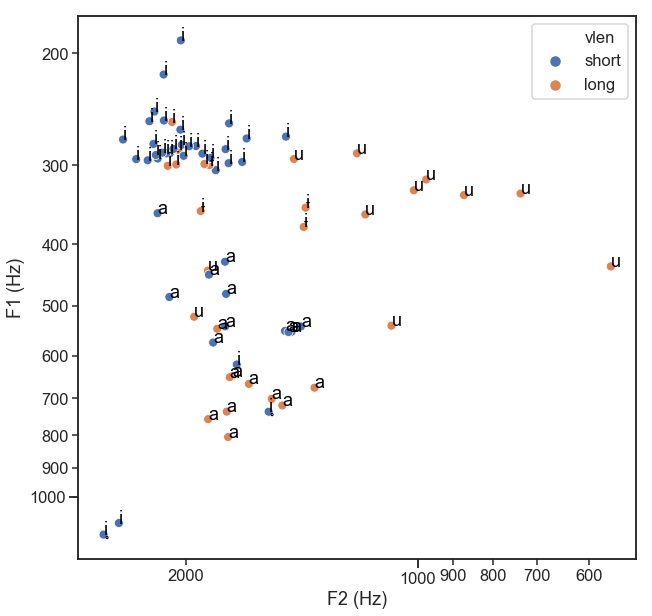

In [8]:
sns.set(style='ticks', context='talk')
plt.figure(figsize=(10,10))

#plot the data
pl = sns.scatterplot(x="F2",y="F1", hue="vlen", data=vdf)

#Invert axes to correlate with articulatory space!
pl.invert_yaxis()
pl.invert_xaxis()

#Add Hz to the axis labels
plt.ylabel("F1 (Hz)")
plt.xlabel("F2 (Hz)")

# convert to log scale
pl.loglog()
pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())

# add labels
vdf.apply(lambda x: pl.text(x.F2, x.F1, x.vqual,
                                size='medium', color='black'),
              axis=1)

plt.show()

But perhaps that's too much information... So let's do that again but first average the formant values by vowel quality and length.  This will, incidentally, also average the time and duration values.

In [9]:
vmeansdf = vdf.groupby(['vqual','vlen']).mean().reset_index()
vmeansdf.head()

,vqual,vlen,time,duration,F1,F2,F3
0,a,long,154.823756,10.798402,689.012521,1680.002174,2500.038868
1,a,short,77.742412,9.607369,499.148533,1742.764118,2259.725779
2,i,long,63.981279,15.311956,287.877337,2040.070213,3028.593176
3,i,short,72.993988,9.809992,313.157378,2020.946505,2745.999263
4,i̥,short,155.252594,7.794164,941.509229,2061.586031,3221.506511


Same plot as before, but with the averages.

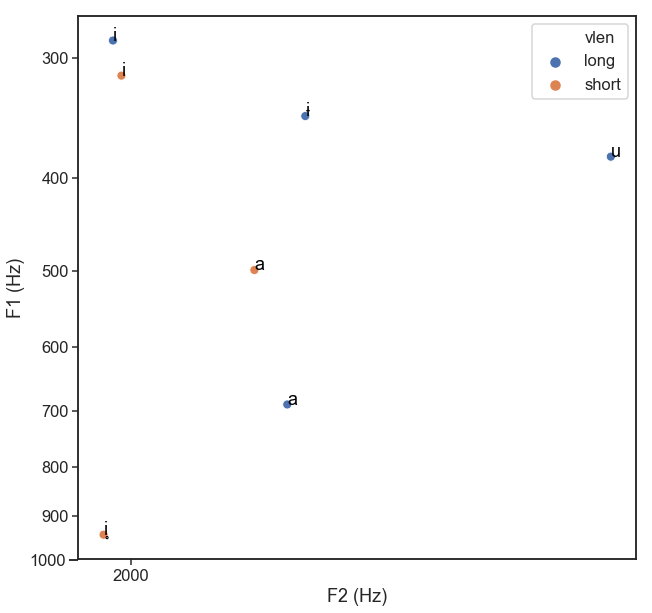

In [10]:
sns.set(style='ticks', context='talk')
plt.figure(figsize=(10,10))

#plot the data
pl = sns.scatterplot(x="F2",y="F1", hue="vlen", data=vmeansdf)

#Invert axes to correlate with articulatory space!
pl.invert_yaxis()
pl.invert_xaxis()

#Add Hz to the axis labels
plt.ylabel("F1 (Hz)")
plt.xlabel("F2 (Hz)")

# convert to log scale
pl.loglog()
pl.yaxis.set_major_formatter(ticker.ScalarFormatter())
pl.yaxis.set_minor_formatter(ticker.ScalarFormatter())
pl.xaxis.set_major_formatter(ticker.ScalarFormatter())
pl.xaxis.set_minor_formatter(ticker.ScalarFormatter())

# add labels
vmeansdf.apply(lambda x: pl.text(x.F2, x.F1, x.vqual,
                                size='medium', color='black'),
              axis=1)

plt.show()

You can also use the same data to look at the duration of vowels.  This will of course be more meaningful when there are more data points, but it is interesting that /ii/ doesn't seem longer than /i/.  Suggests that there's something worth looking into, whether it's from an error in one of the scripts or in coding the data, or if it's related to the phonology or morphophonology of the language.

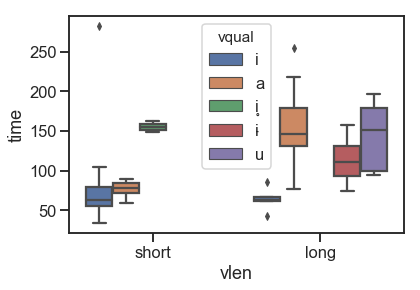

In [11]:
sns.boxplot(x='vlen',y='time',data=vdf,hue='vqual')